In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
import plotly.figure_factory as ff

# Cargar el archivo CSV
data = pd.read_csv('Solicitudes_ProcesoWally-Carga.csv', delimiter=';')
#data = pd.read_csv('Solicitudes_ProcesoWally-Carga.csv')
# Mostrar las primeras filas del dataframe
data.head()


def show_table(data):
    return data.head()


def plot_bar(data):
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) == 0:
        print("No hay columnas categóricas disponibles para visualizar.")
        return
    # Elegir la columna categórica con la menor cantidad de categorías
    col = min(categorical_cols, key=lambda x: data[x].nunique())
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Frecuencia de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_pie(data):
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) <= 1:
        print("No hay suficientes columnas categóricas disponibles para visualizar.")
        return
    # Elegir otra columna categórica
    col = categorical_cols[1]
    data[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Proporción de {col}')
    plt.ylabel('')
    plt.show()

def plot_histogram(data):
    numeric_cols = data.select_dtypes(include=['float64', 'int64', 'int32']).columns
    if len(numeric_cols) == 0:
        print("No hay columnas numéricas disponibles para visualizar.")
        return
    col = numeric_cols[0]
    plt.hist(data[col], bins=30, color='lightgreen', edgecolor='black')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y')
    plt.show()


def plot_line(data):
    date_cols = data.select_dtypes(include=['datetime']).columns
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    if len(date_cols) == 0 or len(numeric_cols) == 0:
        print("No hay columnas de fecha y/o numéricas disponibles para visualizar.")
        return
    plt.plot(data[date_cols[0]], data[numeric_cols[0]], color='royalblue')
    plt.title(f'Tendencia de {numeric_cols[0]} en función de {date_cols[0]}')
    plt.xlabel(date_cols[0])
    plt.ylabel(numeric_cols[0])
    plt.xticks(rotation=45)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

def plot_scatter(data):
    numeric_cols = data.select_dtypes(include=['float64', 'int64', 'int32']).columns
    if len(numeric_cols) < 2:
        print("No hay suficientes columnas numéricas disponibles para visualizar.")
        return
    plt.scatter(data[numeric_cols[0]], data[numeric_cols[1]], color='purple', alpha=0.6)
    plt.title(f'Relación entre {numeric_cols[0]} y {numeric_cols[1]}')
    plt.xlabel(numeric_cols[0])
    plt.ylabel(numeric_cols[1])
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


def plot_box(data):
    numeric_cols = data.select_dtypes(include=['float64', 'int64', 'int32']).columns
    if len(numeric_cols) == 0:
        print("No hay columnas numéricas disponibles para visualizar.")
        return
    plt.boxplot(data[numeric_cols[0]], vert=False, patch_artist=True, boxprops=dict(facecolor='lightyellow'))
    plt.title(f'Distribución de {numeric_cols[0]}')
    plt.xlabel(numeric_cols[0])
    plt.yticks([])
    plt.grid(axis='x')
    plt.show()

def plot_area(data):
    date_cols = data.select_dtypes(include=['datetime']).columns
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    if len(date_cols) == 0 or len(numeric_cols) == 0:
        print("No hay columnas de fecha y/o numéricas disponibles para visualizar.")
        return
    plt.fill_between(data[date_cols[0]], data[numeric_cols[0]], color='lightpink', label=numeric_cols[0])
    plt.title(f'Evolución de {numeric_cols[0]} en función de {date_cols[0]}')
    plt.xlabel(date_cols[0])
    plt.ylabel(numeric_cols[0])
    plt.xticks(rotation=45)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Movimientos                 30 non-null     int64  
 1   Fecha de solicitud          30 non-null     object 
 2   Tipo de transacción         30 non-null     object 
 3   Estado                      30 non-null     object 
 4   Signo                       30 non-null     object 
 5   Monto                       30 non-null     object 
 6   Comisión                    30 non-null     object 
 7   Impuesto                    30 non-null     object 
 8   Pago                        30 non-null     object 
 9   Número de identificación    15 non-null     object 
 10  Número de cliente           15 non-null     float64
 11  Nombre Cliente              15 non-null     object 
 12  Teléfono                    15 non-null     float64
 13  Nro de tarjeta enmascarado  0 non-nul

In [141]:
show_table(data)

,Movimientos,Fecha de solicitud,Tipo de transacción,Estado,Signo,Monto,Comisión,Impuesto,Pago,Número de identificación,...,Terminal,Lote,Recibo,Huella del Dispositivo,Código de respuesta,Código de autorización,RRN,Código de afiliado,Descripción.1,Saldo Actual
0,543063,22/09/2023 20:54:20,Recarga con carga a saldo operativo,Aprobada,+,"2,00","0,05","0,00","1,95",A4016229,...,Emagic,202309222054201443,STAN202309222054201443,NaN,0,903658,RRN202309222054201443,NaN,Transferencia a billetera desde Emagic,"39,30"
1,543064,22/09/2023 20:54:20,Debito al saldo operativo,Aprobada,-,"2,00","0,00","0,00","0,00",NaN,...,Emagic,202309222054201443,STAN202309222054201443,NaN,0,687605,RRN202309222054201443,NaN,Transferencia a billetera desde Emagic,"35,63"
2,537378,20/09/2023 9:40:38,Recarga con carga a saldo operativo,Aprobada,+,"2,00","0,05","0,00","1,95",A4016229,...,Emagic,202309200940377953,STAN202309200940377953,NaN,0,671536,RRN202309200940377953,NaN,Transferencia a billetera desde Emagic,"39,30"
3,537379,20/09/2023 9:40:38,Debito al saldo operativo,Aprobada,-,"2,00","0,00","0,00","0,00",NaN,...,Emagic,202309200940377953,STAN202309200940377953,NaN,0,333365,RRN202309200940377953,NaN,Transferencia a billetera desde Emagic,"35,63"
4,536745,19/09/2023 20:49:47,Recarga con carga a saldo operativo,Aprobada,+,"1,10","0,03","0,00","1,07",A4016229,...,Emagic,202309192049469458,STAN202309192049469458,NaN,0,56559,RRN202309192049469458,NaN,Transferencia a billetera desde Emagic,"39,30"


## depurando data

In [142]:

# Convertir la columna "Fecha de solicitud" a datetime
data['Fecha de solicitud'] = pd.to_datetime(data['Fecha de solicitud'], format='%d/%m/%Y %H:%M:%S') # data[columna_fechaSolicitud] = pd.to_datetime(data[columna_fechaSolicitud]....
# Crear columnas separadas para el día, mes y año
data['Dia'] = data['Fecha de solicitud'].dt.day
data['Mes'] = data['Fecha de solicitud'].dt.month
data['Año'] = data['Fecha de solicitud'].dt.year
# Crear columnas separadas para la hora, minuto y segundo
data['Hora'] = data['Fecha de solicitud'].dt.hour
data['Minuto'] = data['Fecha de solicitud'].dt.minute
data['Segundo'] = data['Fecha de solicitud'].dt.second


In [143]:
print("Hay Nan en el DataFrame: ",data.isna().any().any()) #Verificar si hay NaN en el DataFrame:
print("Numero de Nan en cada columna\n",data.isna().sum()) #Contar el número de NaN en cada columna
print("Contar el total de NaN en todo el DataFrame",data.isna().sum().sum()) #Contar el total de NaN en todo el DataFrame
print("Visualizar las filas que contienen NaN en una columna específica", data[data['Monto'].isna()]) #Visualizar las filas que contienen NaN en una columna específica: Monto

Hay Nan en el DataFrame:  True
Numero de Nan en cada columna
 Movimientos                    0
Fecha de solicitud             0
Tipo de transacción            0
Estado                         0
Signo                          0
Monto                          0
Comisión                       0
Impuesto                       0
Pago                           0
Número de identificación      15
Número de cliente             15
Nombre Cliente                15
Teléfono                      15
Nro de tarjeta enmascarado    30
Tipo de tarjeta               30
Descripción                    0
Terminal                       0
Lote                           0
Recibo                         0
Huella del Dispositivo        30
Código de respuesta            0
Código de autorización         0
RRN                            0
Código de afiliado            30
Descripción.1                  0
Saldo Actual                   0
Dia                            0
Mes                            0
Año           

In [144]:
#data.dropna(inplace=True) #Eliminar filas con NaN:
data.fillna(0, inplace=True) #reemplazar todos los valores NaN en tu DataFrame con cero

In [145]:
print("Hay Nan en el DataFrame: ",data.isna().any().any()) #Verificar si hay NaN en el DataFrame:
print("Numero de Nan en cada columna\n",data.isna().sum()) #Contar el número de NaN en cada columna
print("Contar el total de NaN en todo el DataFrame",data.isna().sum().sum()) #Contar el total de NaN en todo el DataFrame

Hay Nan en el DataFrame:  False
Numero de Nan en cada columna
 Movimientos                   0
Fecha de solicitud            0
Tipo de transacción           0
Estado                        0
Signo                         0
Monto                         0
Comisión                      0
Impuesto                      0
Pago                          0
Número de identificación      0
Número de cliente             0
Nombre Cliente                0
Teléfono                      0
Nro de tarjeta enmascarado    0
Tipo de tarjeta               0
Descripción                   0
Terminal                      0
Lote                          0
Recibo                        0
Huella del Dispositivo        0
Código de respuesta           0
Código de autorización        0
RRN                           0
Código de afiliado            0
Descripción.1                 0
Saldo Actual                  0
Dia                           0
Mes                           0
Año                           0
Hora     

In [146]:
# Reemplazar las comas por puntos y convertir la columna a float64
data['Monto'] = data['Monto'].str.replace(',', '.').astype(float)
# Reemplazar las comas por puntos y convertir la columna a float64
data['Comisión'] = data['Comisión'].str.replace(',', '.').astype(float)
# Reemplazar las comas por puntos y convertir la columna a float64
data['Impuesto'] = data['Impuesto'].str.replace(',', '.').astype(float)
# Reemplazar las comas por puntos y convertir la columna a float64
data['Pago'] = data['Pago'].str.replace(',', '.').astype(float)
# Reemplazar las comas por puntos y convertir la columna a float64
data['Saldo Actual'] = data['Saldo Actual'].str.replace(',', '.').astype(float)


In [147]:
reemplazos = {
    "Recarga con carga a saldo operativo": "RECARGA",
    "Debito al saldo operativo": "DEBITO"
}

# Reemplazar los valores y cambiar el tipo de datos a category
data['Tipo de transacción'] = data['Tipo de transacción'].replace(reemplazos).astype('category')

In [148]:
data['Código de afiliado'] = data['Código de afiliado'].astype(int) #convertir una columna de tipo float a int en pandas

In [149]:
data['Estado'] = data['Estado'].astype('category') # convertir una columna de tipo object a category en pandas
data['Signo'] = data['Signo'].astype('category') # convertir una columna de tipo object a category en pandas

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Movimientos                 30 non-null     int64         
 1   Fecha de solicitud          30 non-null     datetime64[ns]
 2   Tipo de transacción         30 non-null     category      
 3   Estado                      30 non-null     category      
 4   Signo                       30 non-null     category      
 5   Monto                       30 non-null     float64       
 6   Comisión                    30 non-null     float64       
 7   Impuesto                    30 non-null     float64       
 8   Pago                        30 non-null     float64       
 9   Número de identificación    30 non-null     object        
 10  Número de cliente           30 non-null     float64       
 11  Nombre Cliente              30 non-null     object        
 

In [151]:
print(data)

    Movimientos  Fecha de solicitud Tipo de transacción    Estado Signo  \
0        543063 2023-09-22 20:54:20             RECARGA  Aprobada     +   
1        543064 2023-09-22 20:54:20              DEBITO  Aprobada     -   
2        537378 2023-09-20 09:40:38             RECARGA  Aprobada     +   
3        537379 2023-09-20 09:40:38              DEBITO  Aprobada     -   
4        536745 2023-09-19 20:49:47             RECARGA  Aprobada     +   
5        536746 2023-09-19 20:49:47              DEBITO  Aprobada     -   
6        536711 2023-09-19 20:37:22             RECARGA  Aprobada     +   
7        536712 2023-09-19 20:37:22              DEBITO  Aprobada     -   
8        536596 2023-09-19 19:32:37             RECARGA  Aprobada     +   
9        536597 2023-09-19 19:32:37              DEBITO  Aprobada     -   
10       535881 2023-09-19 14:16:19             RECARGA  Aprobada     +   
11       535882 2023-09-19 14:16:19              DEBITO  Aprobada     -   
12       523943 2023-09-1

In [152]:
dataA = data.copy()

### matriz de correlacion de pearson

In [153]:
dataA['Signo'] = dataA['Signo'].replace({'+': 1, '-': 0}) #reemplazar el signo '+' por 1 y el signo '-' por 0 usando el método replace() de pandas. 

encoder = LabelEncoder()
dataA['Número de identificación'] = encoder.fit_transform(dataA['Número de identificación'].astype(str))
dataA['Nombre Cliente'] = encoder.fit_transform(dataA['Nombre Cliente'].astype(str))
dataA['Terminal'] = encoder.fit_transform(dataA['Terminal'].astype(str))
dataA['Descripción'] = encoder.fit_transform(dataA['Descripción'].astype(str))
dataA['Estado'] = encoder.fit_transform(dataA['Estado'].astype(str))
dataA['Recibo'] = encoder.fit_transform(dataA['Recibo'].astype(str))
dataA['Tipo de transacción'] = encoder.fit_transform(dataA['Tipo de transacción'].astype(str))
dataA['RRN'] = encoder.fit_transform(dataA['RRN'].astype(str))
dataA['Descripción.1'] = encoder.fit_transform(dataA['Descripción.1'].astype(str))


'''
    Si más adelante necesitas revertir la transformación y obtener las cadenas originales a partir de los números, puedes usar el método inverse_transform() del encoder:

    original_values = encoder.inverse_transform(data['Número de identificación'])
'''


"\n    Si más adelante necesitas revertir la transformación y obtener las cadenas originales a partir de los números, puedes usar el método inverse_transform() del encoder:\n\n    original_values = encoder.inverse_transform(data['Número de identificación'])\n"

c:\Users\Richi\miniconda3\envs\Python311\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



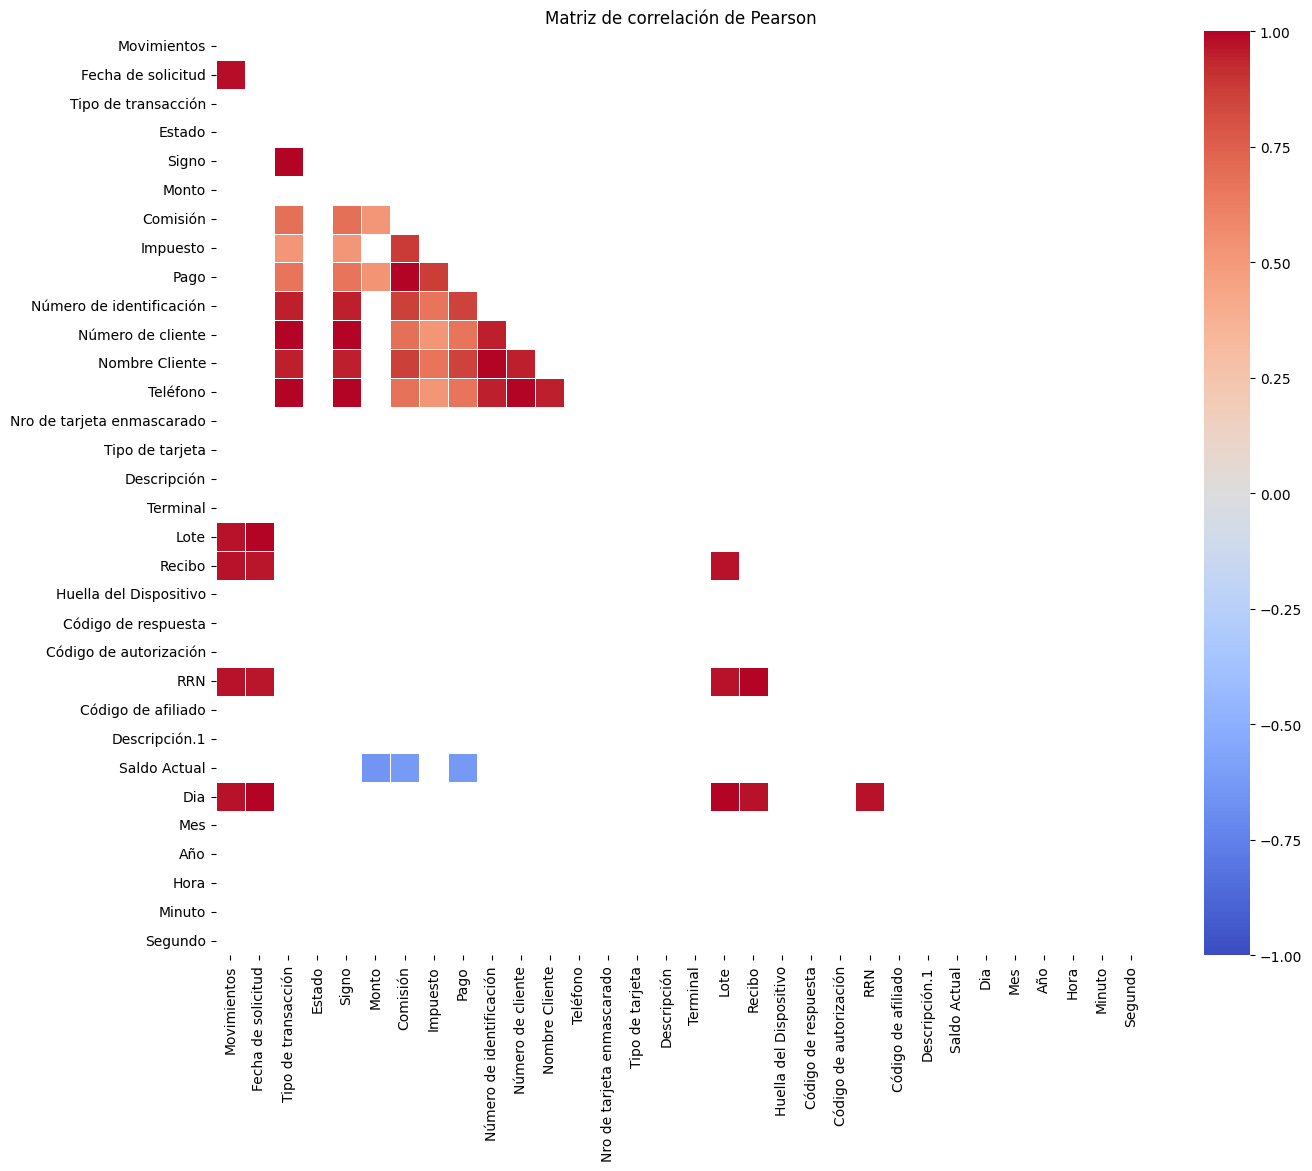

In [154]:
correlation_matrix = dataA.corr()
# Establecer un tamaño para la figura
plt.figure(figsize=(15, 12))

# Crear una máscara para la parte superior del triángulo (ya que la matriz es espejo)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Establecer un umbral para mostrar sólo correlaciones significativas
threshold = 0.5
mask |= np.abs(correlation_matrix) < threshold

# Dibujar el mapa de calor
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, mask=mask, linewidths=0.5)

# Ajustar el título y mostrar el gráfico
plt.title("Matriz de correlación de Pearson")
plt.show()

c:\Users\Richi\miniconda3\envs\Python311\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



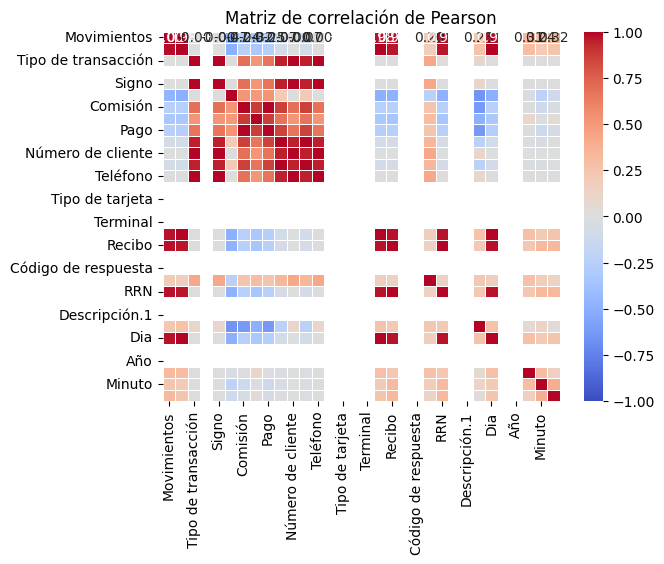

In [155]:
# Dibujar el mapa de calor con las anotaciones (valores)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Ajustar el título y mostrar el gráfico
plt.title("Matriz de correlación de Pearson")
plt.show()

In [156]:

# Crear una matriz de correlación interactiva
fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=list(correlation_matrix.columns),
    y=list(correlation_matrix.index),
    annotation_text=correlation_matrix.round(2).values,
    colorscale='Viridis',
    reversescale=True,
    showscale=True
)

# Ajustar el tamaño y el título
fig.update_layout(title='Matriz de correlación de Pearson', width=800, height=700)

# Mostrar el gráfico
fig.show()

In [157]:
dataA.head()

,Movimientos,Fecha de solicitud,Tipo de transacción,Estado,Signo,Monto,Comisión,Impuesto,Pago,Número de identificación,...,RRN,Código de afiliado,Descripción.1,Saldo Actual,Dia,Mes,Año,Hora,Minuto,Segundo
0,543063,2023-09-22 20:54:20,1,0,1,2.0,0.05,0.0,1.95,1,...,14,0,0,39.30,22,9,2023,20,54,20
1,543064,2023-09-22 20:54:20,0,0,0,2.0,0.00,0.0,0.00,0,...,14,0,0,35.63,22,9,2023,20,54,20
2,537378,2023-09-20 09:40:38,1,0,1,2.0,0.05,0.0,1.95,1,...,13,0,0,39.30,20,9,2023,9,40,38
3,537379,2023-09-20 09:40:38,0,0,0,2.0,0.00,0.0,0.00,0,...,13,0,0,35.63,20,9,2023,9,40,38
4,536745,2023-09-19 20:49:47,1,0,1,1.1,0.03,0.0,1.07,1,...,12,0,0,39.30,19,9,2023,20,49,47


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Movimientos                 30 non-null     int64         
 1   Fecha de solicitud          30 non-null     datetime64[ns]
 2   Tipo de transacción         30 non-null     category      
 3   Estado                      30 non-null     category      
 4   Signo                       30 non-null     category      
 5   Monto                       30 non-null     float64       
 6   Comisión                    30 non-null     float64       
 7   Impuesto                    30 non-null     float64       
 8   Pago                        30 non-null     float64       
 9   Número de identificación    30 non-null     object        
 10  Número de cliente           30 non-null     float64       
 11  Nombre Cliente              30 non-null     object        
 

In [159]:
columnas_a_eliminar = ['Movimientos', 'Descripción', 'Año', 'Minuto', 'Segundo', 'Descripción.1']
data = data.drop(columnas_a_eliminar, axis=1)


In [160]:
data.head()

,Fecha de solicitud,Tipo de transacción,Estado,Signo,Monto,Comisión,Impuesto,Pago,Número de identificación,Número de cliente,...,Recibo,Huella del Dispositivo,Código de respuesta,Código de autorización,RRN,Código de afiliado,Saldo Actual,Dia,Mes,Hora
0,2023-09-22 20:54:20,RECARGA,Aprobada,+,2.0,0.05,0.0,1.95,A4016229,990113547.0,...,STAN202309222054201443,0.0,0,903658,RRN202309222054201443,0,39.30,22,9,20
1,2023-09-22 20:54:20,DEBITO,Aprobada,-,2.0,0.00,0.0,0.00,0,0.0,...,STAN202309222054201443,0.0,0,687605,RRN202309222054201443,0,35.63,22,9,20
2,2023-09-20 09:40:38,RECARGA,Aprobada,+,2.0,0.05,0.0,1.95,A4016229,990113547.0,...,STAN202309200940377953,0.0,0,671536,RRN202309200940377953,0,39.30,20,9,9
3,2023-09-20 09:40:38,DEBITO,Aprobada,-,2.0,0.00,0.0,0.00,0,0.0,...,STAN202309200940377953,0.0,0,333365,RRN202309200940377953,0,35.63,20,9,9
4,2023-09-19 20:49:47,RECARGA,Aprobada,+,1.1,0.03,0.0,1.07,A4016229,990113547.0,...,STAN202309192049469458,0.0,0,56559,RRN202309192049469458,0,39.30,19,9,20


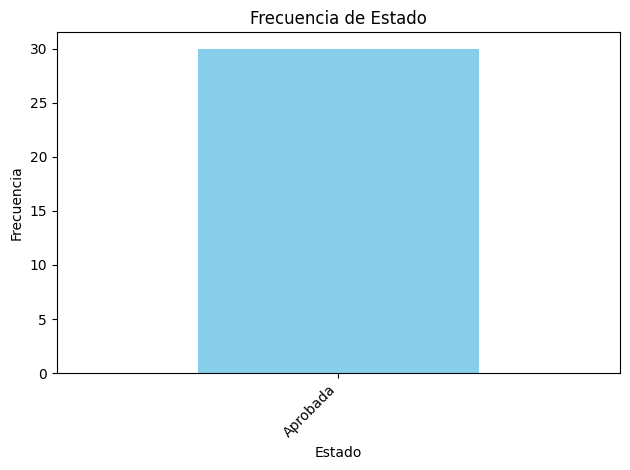

In [161]:
plot_bar(data)

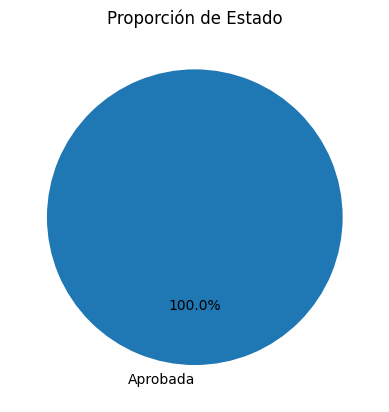

In [162]:
plot_pie(data)

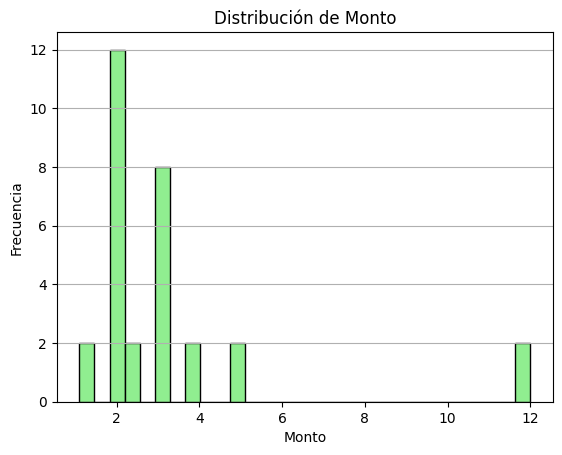

In [163]:
plot_histogram(data)

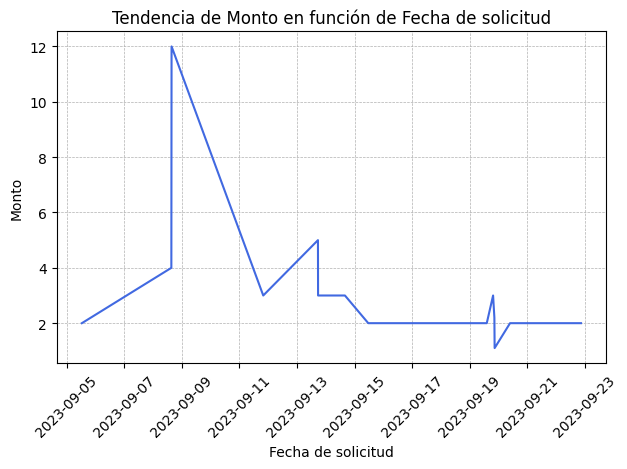

In [164]:
plot_line(data)

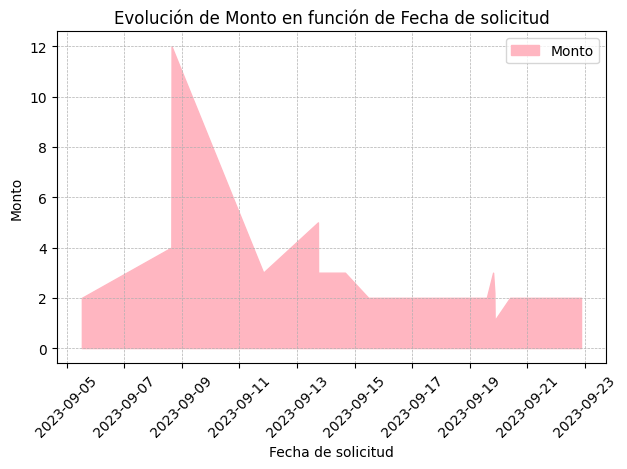

In [165]:
plot_area(data)

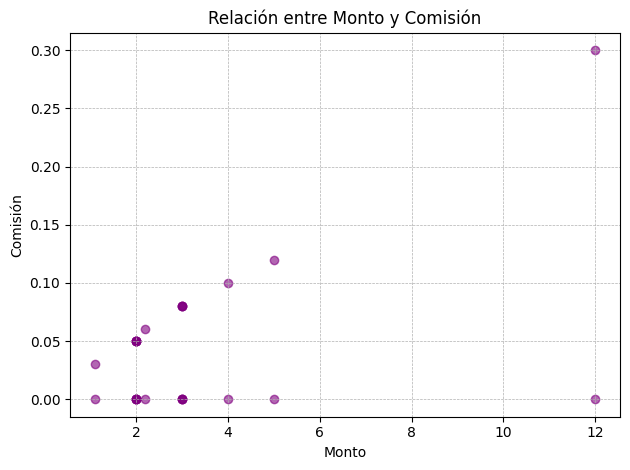

In [166]:
plot_scatter(data)

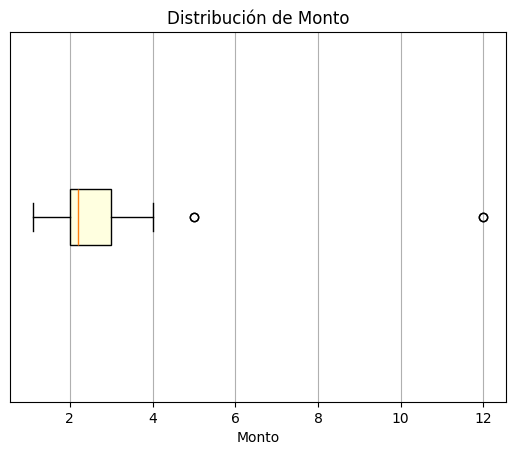

In [167]:
plot_box(data)

# INTERACTIVO

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

numeric_cols = data.select_dtypes(include=['float64', 'int64', 'int32']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
date_cols = data.select_dtypes(include=['datetime']).columns.tolist()

# Gráfico de barras
@widgets.interact(col=categorical_cols)
def interactive_bar(col=categorical_cols[0]):
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Frecuencia de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Gráfico de pastel
@widgets.interact(col=categorical_cols)
def interactive_pie(col=categorical_cols[0]):
    data[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Proporción de {col}')
    plt.ylabel('')
    plt.show()

# Histograma
@widgets.interact(col=numeric_cols, bins=widgets.IntSlider(value=30, min=10, max=100, step=1))
def interactive_histogram(col=numeric_cols[0], bins=30):
    plt.hist(data[col], bins=bins, color='lightgreen', edgecolor='black')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y')
    plt.show()

# Gráfico de línea
@widgets.interact(date_col=date_cols, y_col=numeric_cols)
def interactive_line(date_col=date_cols[0], y_col=numeric_cols[0]):
    plt.plot(data[date_col], data[y_col], color='royalblue')
    plt.title(f'Tendencia de {y_col} en función de {date_col}')
    plt.xlabel(date_col)
    plt.ylabel(y_col)
    plt.xticks(rotation=45)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

# Gráfico de dispersión
@widgets.interact(x_col=numeric_cols, y_col=numeric_cols)
def interactive_scatter(x_col=numeric_cols[0], y_col=numeric_cols[1]):
    plt.scatter(data[x_col], data[y_col], color='purple', alpha=0.6)
    plt.title(f'Relación entre {x_col} y {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

# Box plot
@widgets.interact(col=numeric_cols)
def interactive_box(col=numeric_cols[0]):
    plt.boxplot(data[col], vert=False, patch_artist=True, boxprops=dict(facecolor='lightyellow'))
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.yticks([])
    plt.grid(axis='x')
    plt.show()

# Gráfico de área
@widgets.interact(date_col=date_cols, y_col=numeric_cols)
def interactive_area(date_col=date_cols[0], y_col=numeric_cols[0]):
    plt.fill_between(data[date_col], data[y_col], color='lightpink', label=y_col)
    plt.title(f'Evolución de {y_col} en función de {date_col}')
    plt.xlabel(date_col)
    plt.ylabel(y_col)
    plt.xticks(rotation=45)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


interactive(children=(Dropdown(description='col', options=('Tipo de transacción', 'Estado', 'Signo', 'Número d…

interactive(children=(Dropdown(description='col', options=('Tipo de transacción', 'Estado', 'Signo', 'Número d…

interactive(children=(Dropdown(description='col', options=('Monto', 'Comisión', 'Impuesto', 'Pago', 'Número de…

interactive(children=(Dropdown(description='date_col', options=('Fecha de solicitud',), value='Fecha de solici…

interactive(children=(Dropdown(description='x_col', options=('Monto', 'Comisión', 'Impuesto', 'Pago', 'Número …

interactive(children=(Dropdown(description='col', options=('Monto', 'Comisión', 'Impuesto', 'Pago', 'Número de…

interactive(children=(Dropdown(description='date_col', options=('Fecha de solicitud',), value='Fecha de solici…